In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import sys
import os
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_tools/lkf_tools/')
from dataset import *
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_detection/functions/')
from statistics_functions import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/p/project/chhb19/gaertner2/data/awicm_cvmix/'
path_ds = path + 'datasets_tuning/use_eps_True/thresh_0.0/'
path_lkfs = path + 'lkfs_tuning/'
path_imgs = path + 'imgs/'

In [5]:
files = os.listdir(path_ds)
files.sort()
try: files.remove('.ipynb_checkpoints')
except: pass

In [6]:
datasets, lkfs = get_lkfs([path_ds + file for file in files])
res_km = get_res_km(datasets[0])

In [7]:
years_all = np.load(path + 'years.npy')
a_mean, a_tot, h_mean, h_tot = np.load(path + 'a_mean_tot_h_mean_tot.npy')

years = [2015, 2095]

inds = [np.where(years_all==year)[0][0] for year in years]
a_tot_sel = a_tot[inds]

# repeat the ice concentration so it has the same length
# as datasets (2015,2095,2015,2095,...)
a_tot_sel = np.vstack([a_tot_sel for _ in range(4)])

In [8]:
n_lkfs = get_n_lkfs(lkfs)
rho_lkfs = n_lkfs / a_tot_sel[:,::15] * 10_000
length, av_length, total_length = get_lkf_length(lkfs, res_km)

In [9]:
dogs = [file.split('_')[1][1:] for file in files]

In [10]:
def plot(var, label, ylim, xranges=(25,25)):

    fig, axs = plt.subplots(1,2, figsize=(10,3))
    
    for ax, data_dec, xrange,  in zip(axs, [var[::2], var[1::2]], xranges):
        for i, data_dog in enumerate(data_dec):
            ax.plot(np.arange(0,365,15)[:xrange], data_dog[:xrange], label=dogs[::2][i])

    axs[1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=r'$d_{LKF}$')
    for ax, title in zip(axs, [2015, 2095]):
        ax.set_ylim([0,ylim])
        ax.set_xlim([0,365])
        ax.grid()
        ax.set_xticks(xticks,[])
        ax.set_xticks(xticks_minor,xticks_labels, rotation=70, minor=True)
        ax.set_title(title)
    axs[0].set_ylabel(label)
    axs[1].yaxis.set_ticklabels([])
    fig.tight_layout()

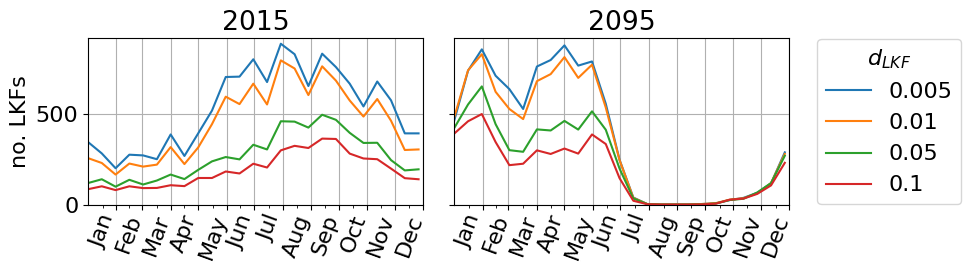

In [11]:
plot(n_lkfs, 'no. LKFs', 920)
#plt.savefig(path_imgs + 'dogtest_no_LKFs.png', dpi=100, bbox_inches='tight')

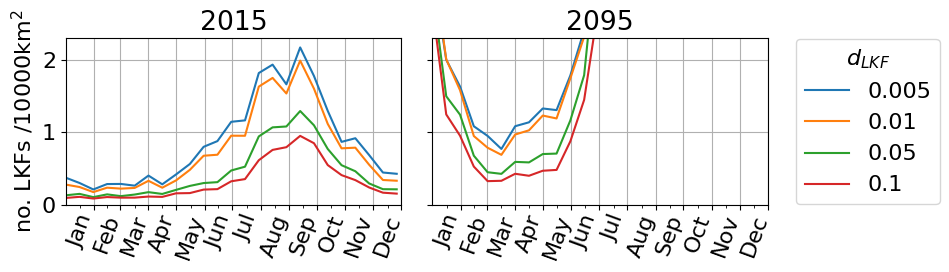

In [12]:
plot(rho_lkfs, r'no. LKFs /10000km$^2$', 2.3, (25, 14))
#plt.savefig(path_imgs + 'dogtest_rho_LKFs.png', dpi=100, bbox_inches='tight')

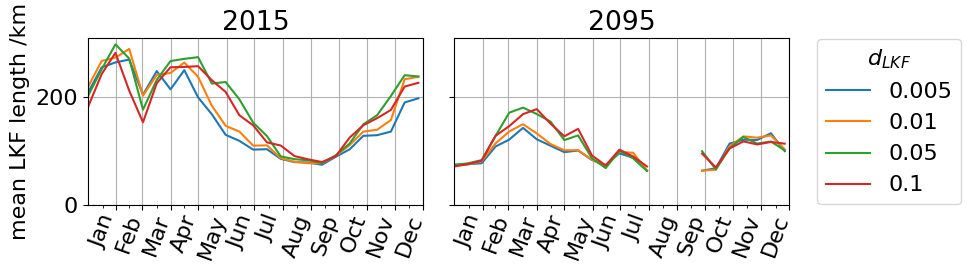

In [13]:
plot(av_length, r'mean LKF length /km', 310)
#plt.savefig(path_imgs + 'dogtest_mean_len_LKFs.png', dpi=100, bbox_inches='tight')

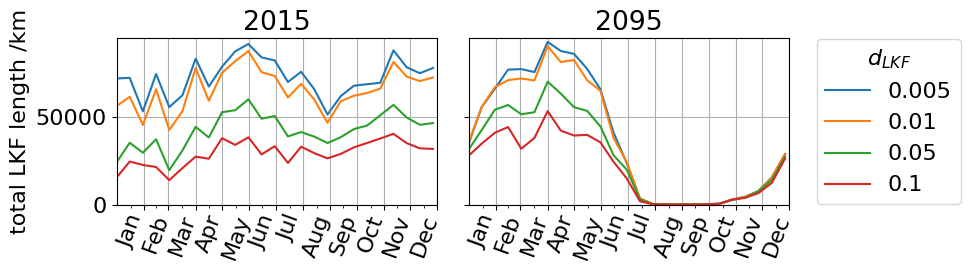

In [14]:
plot(total_length, r'total LKF length /km', 95000)
#plt.savefig(path_imgs + 'dogtest_total_len_LKFs.png', dpi=100, bbox_inches='tight')

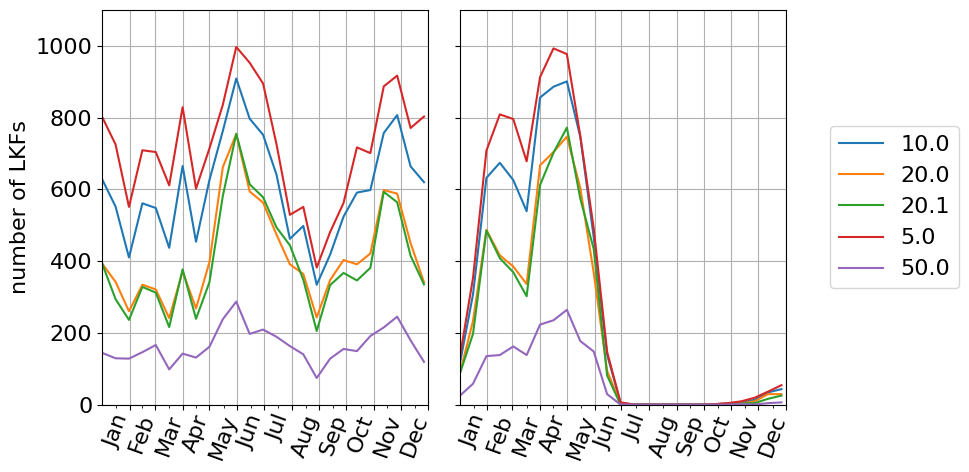

In [643]:
plot(n_lkfs, 'number of LKFs', 1100)

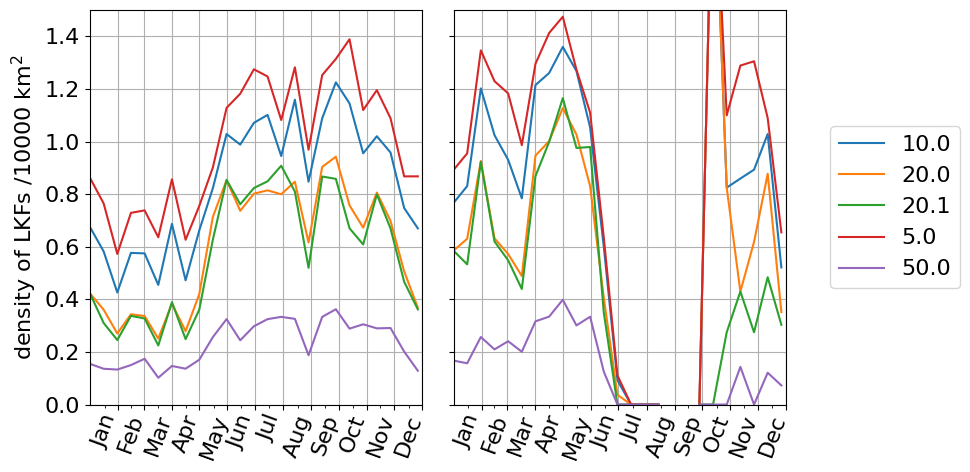

In [644]:
plot(rho_lkfs, r'density of LKFs /10000 km$^2$', 1.5)